In [3]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)

In [2]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_20pct_cluster_labels.csv"
# df_clusters = read.csv(filename, row.names = 1)
# nrow(df_clusters)
# head(df_clusters,2)

In [10]:
### betaG's across cells from model 
df0 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_persistent_genetic_effect_all.txt", sep="\t",row.names = 1)

In [13]:
head(df0)

,beta_G
ENSG00000005059_CCDC109B-4_110648632_T_A,-0.005477985
ENSG00000006016_CRLF1-19_18735221_G_T,-0.056811980
ENSG00000006459_KDM7A-7_139913409_G_A,0.037725084
ENSG00000013297_CLDN11-3_170402765_T_C,-0.121477017
ENSG00000021300_PLEKHB1-11_73339784_G_A,0.136852399
ENSG00000029639_TFB1M-6_155635808_C_G,-0.167087706


In [4]:
### betaGxE's across cells from model 
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
### MOFA factors across cells
df_pcs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv", row.names = 1)

In [5]:
nrow(df)
nrow(df_pcs)

[1] 33964

[1] 34256

In [6]:
cells0 = rownames(df)
df_pcs = df_pcs[cells0,]

In [7]:
head(df,2)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.02962768,0.1829698,-0.03793941,-0.02932441,0.03139850,-0.03962300,0.08013833,0.02749838,...,-0.08185803,-0.1086237,-0.10317566,-0.04854321,0.095111678,-0.002571070,-0.05560833,0.1931245,-0.06168149,0.05468625
21843_1#100,-0.04797379,-0.002567715,-0.05030368,0.1420454,-0.06425603,-0.01789411,-0.06468377,-0.08820444,0.23273882,0.04037590,...,-0.16133495,-0.4557181,-0.09858982,-0.09564130,0.007662211,-0.001386594,-0.09411877,0.2614240,-0.16271379,-0.03705185


In [14]:
colnames(df) = gsub("_\\.","-",colnames(df))

In [15]:
head(df,2)

,ENSG00000005059_CCDC109B-4_110648632_T_A,ENSG00000006016_CRLF1-19_18735221_G_T,ENSG00000006459_KDM7A-7_139913409_G_A,ENSG00000013297_CLDN11-3_170402765_T_C,ENSG00000021300_PLEKHB1-11_73339784_G_A,ENSG00000029639_TFB1M-6_155635808_C_G,ENSG00000033178_UBA6-4_68480525_C_T,ENSG00000035115_SH3YL1-2_256116_G_T,ENSG00000059377_TBXAS1-7_139547370_G_A,ENSG00000063761_ADCK1-14_78311319_G_A,...,ENSG00000248098_BCKDHA-19_41937095_G_A,ENSG00000248124_RRN3P1-16_21818292_A_C,ENSG00000250317_SMIM20-4_25918516_A_G,ENSG00000253203_GUSBP3-5_68922087_T_G,ENSG00000254184_TYW1B-7_72200923_G_A,ENSG00000256018_HIST1H3G-6_26198845_G_C,ENSG00000256073_C21orf119-21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4-17_15434991_C_T,ENSG00000259803_SLC22A31-16_89234110_G_C,ENSG00000267323_SLC25A1P5-19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.02962768,0.1829698,-0.03793941,-0.02932441,0.03139850,-0.03962300,0.08013833,0.02749838,...,-0.08185803,-0.1086237,-0.10317566,-0.04854321,0.095111678,-0.002571070,-0.05560833,0.1931245,-0.06168149,0.05468625
21843_1#100,-0.04797379,-0.002567715,-0.05030368,0.1420454,-0.06425603,-0.01789411,-0.06468377,-0.08820444,0.23273882,0.04037590,...,-0.16133495,-0.4557181,-0.09858982,-0.09564130,0.007662211,-0.001386594,-0.09411877,0.2614240,-0.16271379,-0.03705185


In [16]:
head(df_pcs,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.5977040,1.067436,0.0564961,1.347661,0.6407429,0.3378262,-0.4664193,0.01520844,0.2922428,-0.6327374,-0.5833180,0.4731209,0.4548455,-0.9910469,0.9065298,-0.7866174,0.4459964,-1.810175,-1.0397955,0.26804527
21843_1#100,0.2332847,2.137884,0.6468115,1.129460,-0.3527733,-0.0918056,0.9241371,-0.37349156,1.7895933,-0.6592327,0.4622862,-0.1388127,-2.2209369,1.5540730,-1.5173632,-0.3502506,-0.1655910,1.199816,0.7298591,0.04844414


In [ ]:
# Top most significant for MOFA1:10, possibly significant for MOFA1 too

[1] -0.1091049

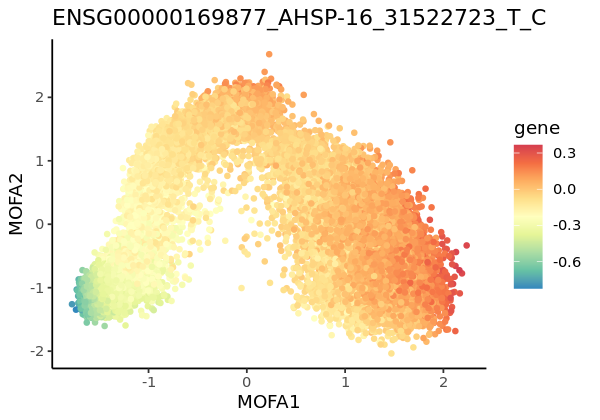

In [26]:
gene = "ENSG00000169877_AHSP-16_31522723_T_C"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.2356903

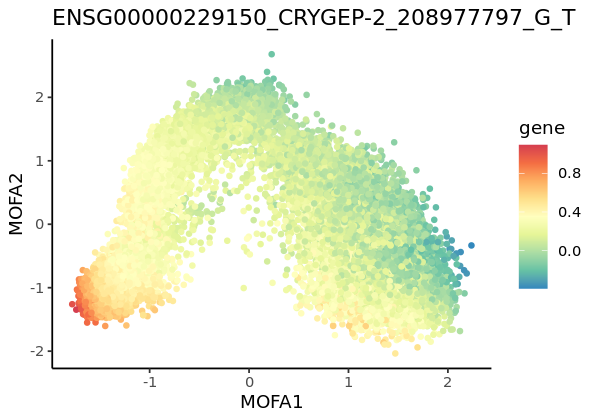

In [27]:
gene = "ENSG00000229150_CRYGEP-2_208977797_G_T"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.145913

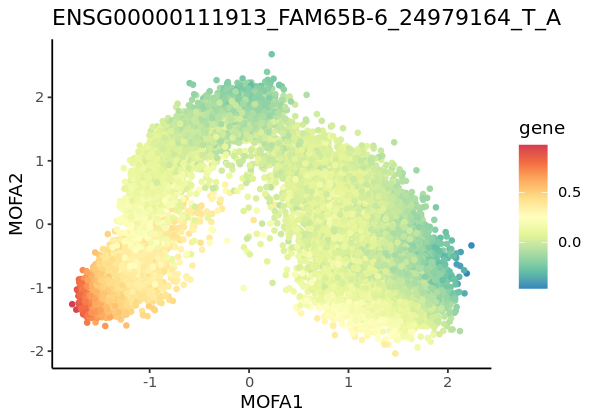

In [28]:
gene = "ENSG00000111913_FAM65B-6_24979164_T_A"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] -0.1198411

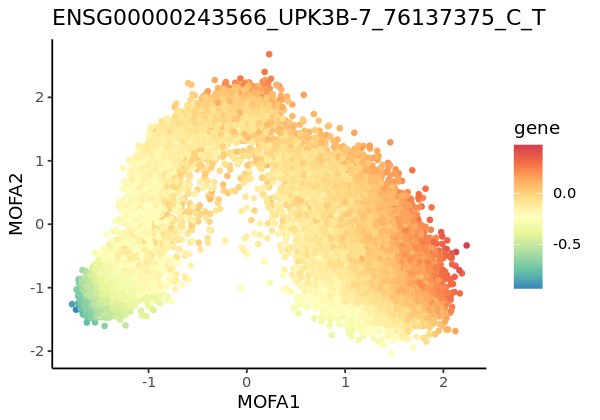

In [29]:
gene = "ENSG00000243566_UPK3B-7_76137375_C_T"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] -0.7289752

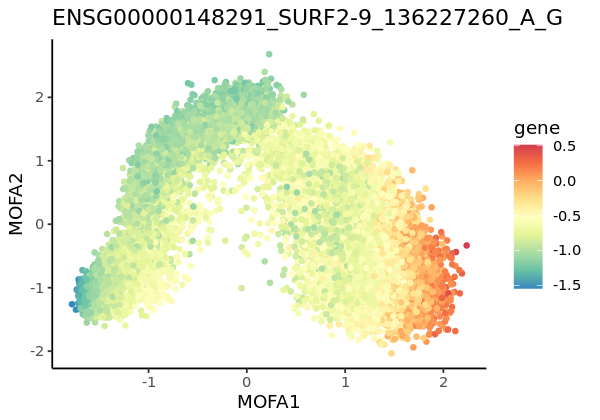

In [30]:
gene = "ENSG00000148291_SURF2-9_136227260_A_G"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] -0.7078382

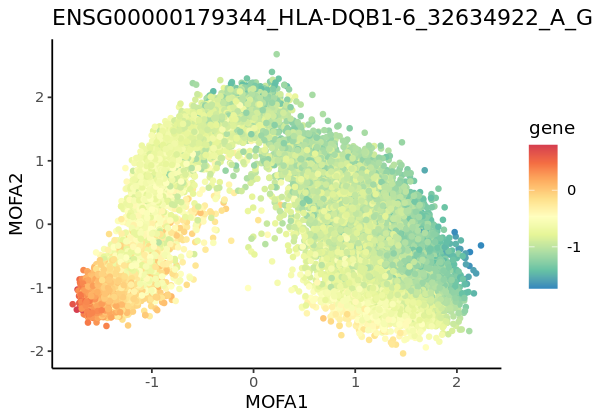

In [47]:
gene = "ENSG00000179344_HLA-DQB1-6_32634922_A_G"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] -1.125249

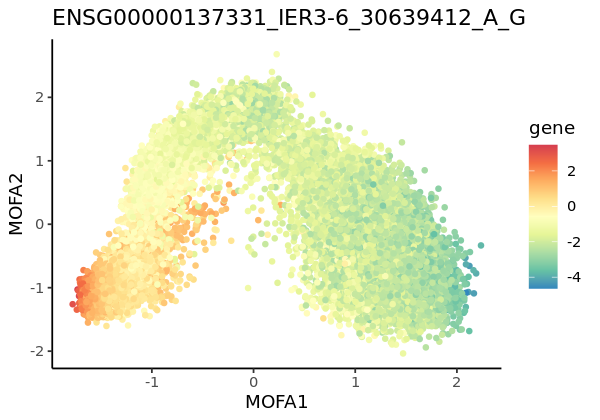

In [19]:
gene = "ENSG00000137331_IER3-6_30639412_A_G"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 1.038627

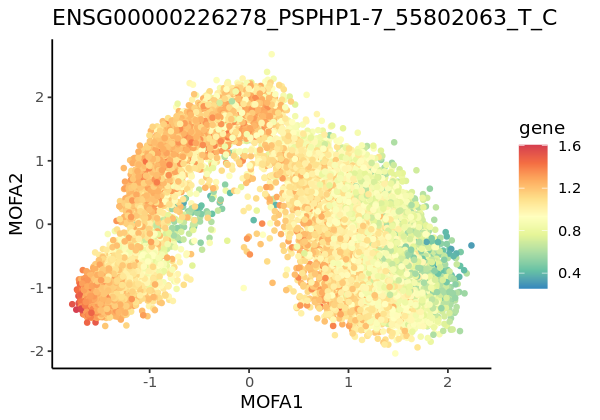

In [43]:
gene = "ENSG00000226278_PSPHP1-7_55802063_T_C"
options(repr.plot.width = 5, repr.plot.height = 3.5)
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

In [ ]:
# Top most significant for MOFA1:10, NOT significant for MOFA1 

[1] 0.05321286

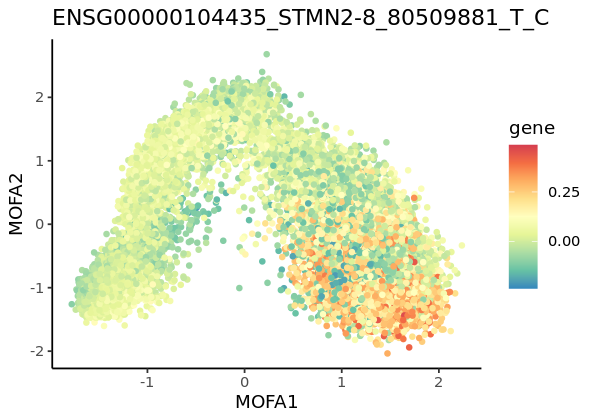

In [20]:
gene = "ENSG00000104435_STMN2-8_80509881_T_C"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.1335304

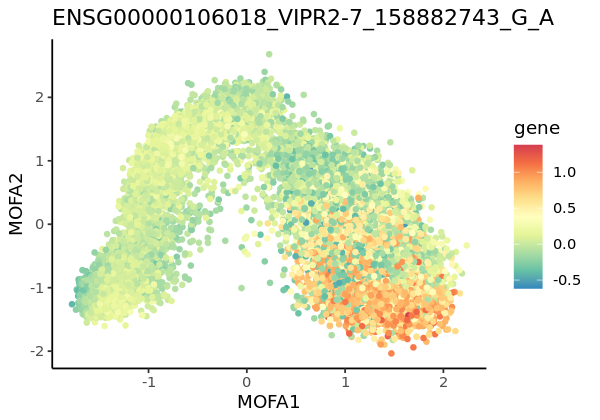

In [21]:
gene = "ENSG00000106018_VIPR2-7_158882743_G_A"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.0464914

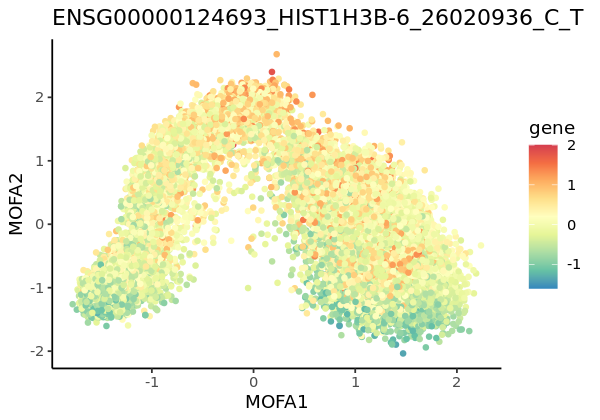

In [22]:
gene = "ENSG00000124693_HIST1H3B-6_26020936_C_T"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.2185956

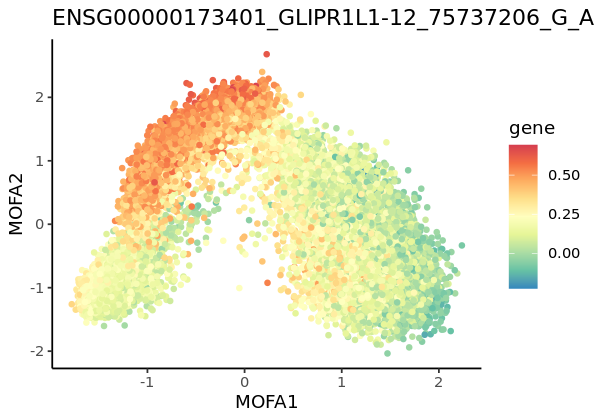

In [25]:
gene = "ENSG00000173401_GLIPR1L1-12_75737206_G_A"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] -0.6213072

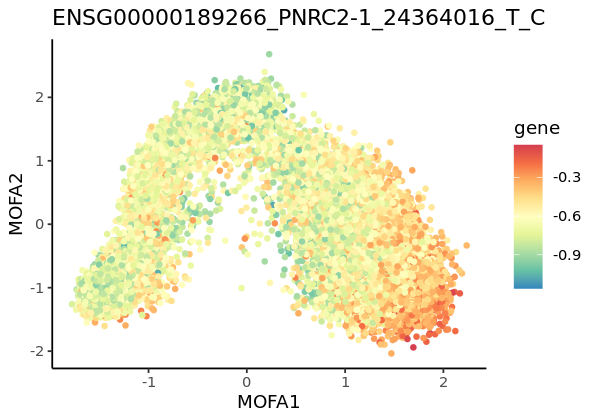

In [48]:
gene = "ENSG00000189266_PNRC2-1_24364016_T_C"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)

[1] 0.1363416

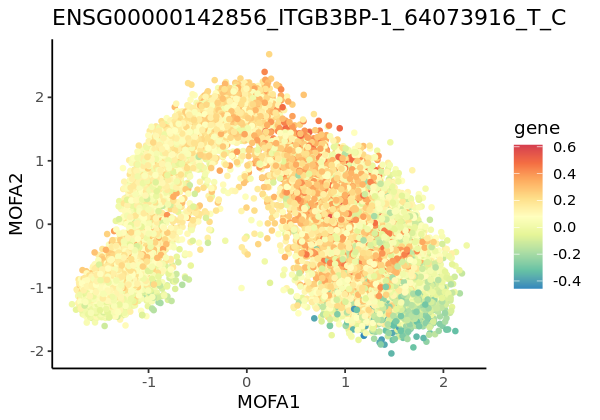

In [50]:
gene = "ENSG00000142856_ITGB3BP-1_64073916_T_C"
df0[gene,]
df_to_plot = cbind(df_pcs[,c("MOFA1","MOFA2")], data.frame(gene = df0[gene,]+df[,gene]))
p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) + geom_point(alpha = 1, size = 1.2) + ggtitle(gene)
p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
print(p)